In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, atan2

In [53]:
#import the countries data from the csv file with an index column of countries
df_even = pd.read_csv("March18_Morning_data.csv")
df_even.info()

#create columns for counts
counts_1_3 = df_even['Chan_0_1']
counts_2_3 = df_even['Chan_0_2']
counts_1_2 = df_even['Chan_1_2']

timestamps = df_even['timestamp'].values
print(type(timestamps))
print(df_even)
df_even.dropna(inplace=True)
df_even.info()
df_even.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Chan_0_1      202 non-null    int64  
 1   Chan_0_2      202 non-null    int64  
 2   Chan_1_2      202 non-null    int64  
 3   timestamp     202 non-null    object 
 4   Latitude      170 non-null    float64
 5   Longitude     170 non-null    float64
 6   Altitude (m)  170 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 11.2+ KB
<class 'numpy.ndarray'>
     Chan_0_1  Chan_0_2  Chan_1_2                  timestamp   Latitude  \
0          15        11        30  Sat Mar  18 11:08:47 2023  33.751984   
1          16        12        21  Sat Mar  18 11:09:47 2023  33.751982   
2          19        12        27  Sat Mar  18 11:10:47 2023  33.751242   
3          16        17        26  Sat Mar  18 11:11:47 2023  33.750882   
4          25        19        28  Sat Mar  18 

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp,Latitude,Longitude,Altitude (m)
0,15,11,30,Sat Mar 18 11:08:47 2023,33.751984,-84.378320,305.101994
1,16,12,21,Sat Mar 18 11:09:47 2023,33.751982,-84.378330,305.279351
2,19,12,27,Sat Mar 18 11:10:47 2023,33.751242,-84.377937,305.846874
3,16,17,26,Sat Mar 18 11:11:47 2023,33.750882,-84.376687,305.693314
4,25,19,28,Sat Mar 18 11:12:47 2023,33.748431,-84.376664,314.319110


In [54]:
# # define the initial point (in this case, New York City)
# lat1 = radians(df_even['Latitude'].values[0])
# lon1 = radians(df_even['Longitude'].values[0])
# df_even['distance'] = 0

# # define a function to calculate the distance between two points
# def calculate_distance(lat2, lon2):
#     R = 6373.0  # radius of the Earth in kilometers
#     if df_even.index != 0:
#         distance = df_even['distance'].values[df_even.index-1]
#     lat1_rad = radians(lat1)
#     lon1_rad = radians(lon1)
#     lat2_rad = radians(lat2)
#     lon2_rad = radians(lon2)

#     dlon = lon2_rad - lon1_rad
#     dlat = lat2_rad - lat1_rad

#     a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
#     c = 2 * atan2(sqrt(a), sqrt(1 - a))
#     distance = distance + c
#     print(c)

#     #distance = R * c
#     #print(distance)
#     return distance

# # apply the function to each row in the DataFrame and save the result in a new column
# df_even['distance'] = df_even.apply(lambda row: calculate_distance(row['Latitude'], row['Longitude']), axis=1)

In [55]:
distance = 0.0
for index, row in df_even.iterrows():
    if index == 0:
        df_even.at[index, "distance"] = 0.0
    else:
        R = 3958.8  # radius of the Earth in miles
        lat1 = df_even.at[0, "Latitude"]
        lon1 = df_even.at[0, "Longitude"]
        lat2 = df_even.at[index, "Latitude"]
        lon2 = df_even.at[index, "Longitude"]
        lat1_rad = radians(lat1)
        lon1_rad = radians(lon1)
        lat2_rad = radians(lat2)
        lon2_rad = radians(lon2)
        dlon = lon2_rad - lon1_rad
        dlat = lat2_rad - lat1_rad
        a = sin(dlat / 2) ** 2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2) ** 2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        dist = R * c
        distance += dist        
        print(distance)
        df_even.at[index, "distance"] = dist


0.0005721798571890313
0.056308834529704865
0.1771044886045332
0.44037585736233165
0.790563236644011
1.2300417347353623
1.890604058585042
2.8412572510759135
3.9711011730936328
5.215470883412289
6.542938413298634
7.7673366613395105
8.984608948277094
10.206499213971057
11.426336379628616
12.647987020396416
13.869864516883933
15.09174201337145
16.310399554751946
17.528811590205986
18.81325701080405
20.153987065077946
21.47030105852515
22.689623592861963
23.90908735616853
24.988086059161855
25.690919458606334
26.10897881273919
26.536071436975963
27.06667797779781
27.7983067937846
29.053809483830605
30.336690624016736
31.714646412334893
33.23761691791664
35.19409740676563
37.557117104078756
40.3155992167406
43.42697636938063
46.647797070840184
50.068850105056995
53.79635492915746
57.61385804210152
61.47001258207701
65.58013062957886
69.94992255178492
74.59005360933747
79.51409842805276
84.63145087243794
89.92918783288184
95.27524093582318
100.64301386427346
106.0746595173558
111.554183085477

In [56]:
print(df_even['distance'])

0      0.000000
1      0.000572
2      0.055737
3      0.120796
4      0.263271
         ...   
165    0.370881
166    0.253835
167    0.169512
168    0.044488
169    0.009047
Name: distance, Length: 170, dtype: float64


In [57]:
df_even['timestamp'] = pd.to_datetime(df_even['timestamp'])
df_even.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp,Latitude,Longitude,Altitude (m),distance
0,15,11,30,2023-03-18 11:08:47,33.751984,-84.378320,305.101994,0.000000
1,16,12,21,2023-03-18 11:09:47,33.751982,-84.378330,305.279351,0.000572
2,19,12,27,2023-03-18 11:10:47,33.751242,-84.377937,305.846874,0.055737
3,16,17,26,2023-03-18 11:11:47,33.750882,-84.376687,305.693314,0.120796
4,25,19,28,2023-03-18 11:12:47,33.748431,-84.376664,314.319110,0.263271


In [58]:
df_even.sort_values(by='timestamp', ascending=True, inplace=True)
df_even.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp,Latitude,Longitude,Altitude (m),distance
0,15,11,30,2023-03-18 11:08:47,33.751984,-84.378320,305.101994,0.000000
1,16,12,21,2023-03-18 11:09:47,33.751982,-84.378330,305.279351,0.000572
2,19,12,27,2023-03-18 11:10:47,33.751242,-84.377937,305.846874,0.055737
3,16,17,26,2023-03-18 11:11:47,33.750882,-84.376687,305.693314,0.120796
4,25,19,28,2023-03-18 11:12:47,33.748431,-84.376664,314.319110,0.263271


In [59]:
df_even_counts = df_even[['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2', 'distance']]
df_even_counts.columns

Index(['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2', 'distance'], dtype='object')

In [60]:
df_even_counts = df_even_counts.resample('T', on = 'timestamp', axis=0).mean()
df_even_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2,distance
timestamp,,,,
2023-03-18 11:08:00,15.0,11.0,30.0,0.000000
2023-03-18 11:09:00,16.0,12.0,21.0,0.000572
2023-03-18 11:10:00,19.0,12.0,27.0,0.055737
2023-03-18 11:11:00,16.0,17.0,26.0,0.120796
2023-03-18 11:12:00,25.0,19.0,28.0,0.263271


In [61]:
df_even_counts['average'] = df_even_counts[['Chan_0_1', 'Chan_0_2', 'Chan_1_2']].mean(axis=1)
df_even_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2,distance,average
timestamp,,,,,
2023-03-18 11:08:00,15.0,11.0,30.0,0.000000,18.666667
2023-03-18 11:09:00,16.0,12.0,21.0,0.000572,16.333333
2023-03-18 11:10:00,19.0,12.0,27.0,0.055737,19.333333
2023-03-18 11:11:00,16.0,17.0,26.0,0.120796,19.666667
2023-03-18 11:12:00,25.0,19.0,28.0,0.263271,24.000000


Text(0, 0.5, 'Counts')

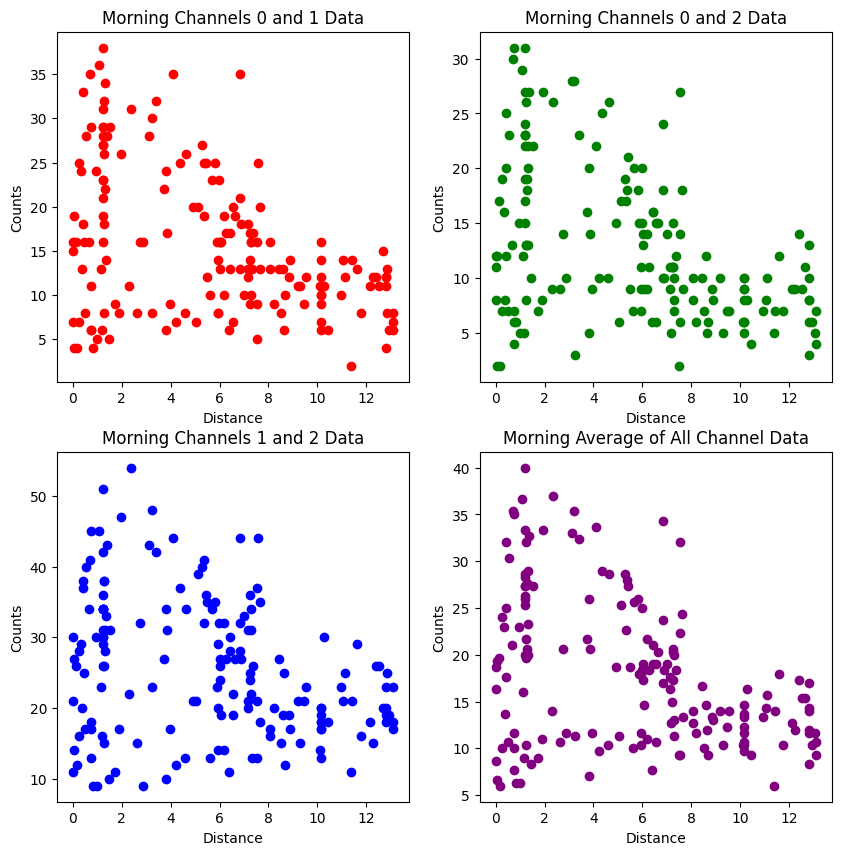

In [62]:
figure, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].scatter(df_even_counts['distance'], df_even_counts['Chan_0_1'], color='red')
ax[0,0].set_title('Morning Channels 0 and 1 Data')
ax[0,0].set_xlabel('Distance')
ax[0,0].set_ylabel('Counts')
ax[0, 1].scatter(df_even_counts['distance'], df_even_counts['Chan_0_2'], color='green')
ax[0,1].set_title('Morning Channels 0 and 2 Data')
ax[0,1].set_xlabel('Distance')
ax[0,1].set_ylabel('Counts')
ax[1, 0].scatter(df_even_counts['distance'], df_even_counts['Chan_1_2'], color='blue')
ax[1,0].set_title('Morning Channels 1 and 2 Data')
ax[1,0].set_xlabel('Distance')
ax[1,0].set_ylabel('Counts')
ax[1, 1].scatter(df_even_counts['distance'], df_even_counts['average'], color='purple')
ax[1,1].set_title('Morning Average of All Channel Data')
ax[1,1].set_xlabel('Distance')
ax[1,1].set_ylabel('Counts')




In [66]:
min = df_even_counts['Chan_0_2'].min()
max = df_even_counts['Chan_0_2'].max()
mean = df_even_counts['Chan_0_2'].mean()
print(max-min)
print(mean)
value = (max - min) / mean
print(value) 

29.0
12.74705882352941
2.2750346100599907


In [67]:
print(min)
print(max)

2.0
31.0
